In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.mh_rw import *

In [79]:
list_scales = [0.1, 1, 5, 10, 50, 100, 500]
N_ITER = 100000
BURN_IN_PERIOD = 10000
SEED = 123

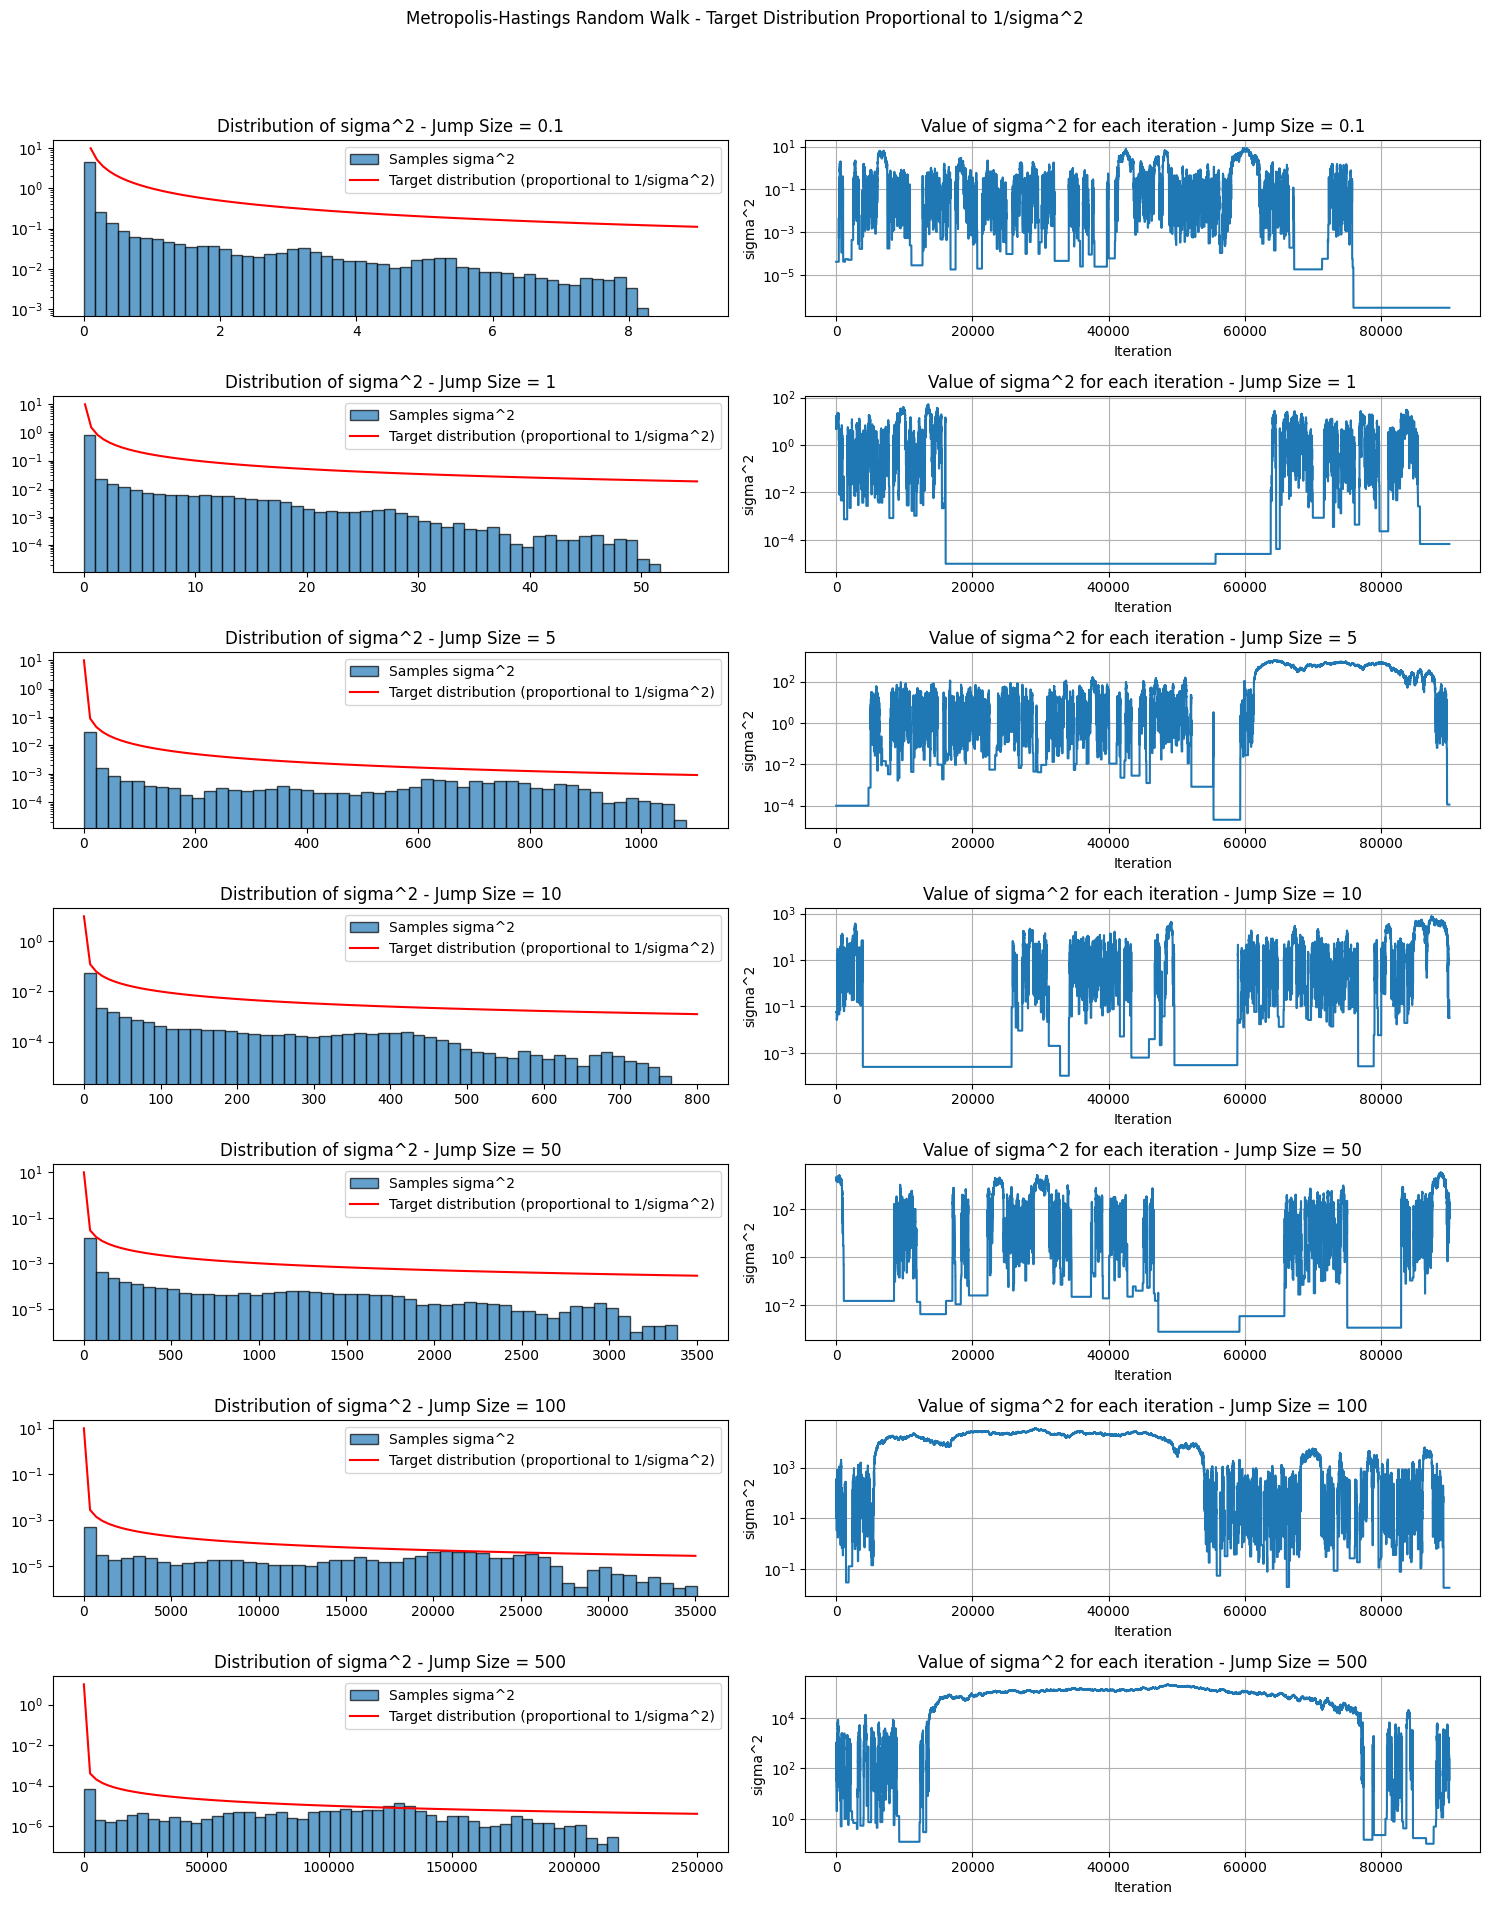

In [83]:
np.random.seed(SEED)
fig, axes = plt.subplots(7, 2, figsize=(15, 20))
fig.suptitle('Metropolis-Hastings Random Walk - Target Distribution Proportional to 1/sigma^2')

for i, SCALE in enumerate(list_scales):
    INITIAL_VALUE = np.random.uniform(0, 10)
    sigma2_samples = metropolis_hastings_rw(n_iter=N_ITER, burn_in_period=BURN_IN_PERIOD, initial_value=INITIAL_VALUE, scale=SCALE)

    plt.subplot(7 , 2, 2*i+1)
    plt.hist(sigma2_samples, bins=50, density=True, alpha=0.7, edgecolor='black', label='Samples sigma^2')
    if SCALE == 0.1:
        x_values = np.linspace(0.1, 9, 100)
    elif SCALE == 1:
        x_values = np.linspace(0.1, 55, 100)
    elif SCALE == 5:
        x_values = np.linspace(0.1, 1100, 100)
    elif SCALE == 10:
        x_values = np.linspace(0.1, 800, 100)
    elif SCALE == 50:
        x_values = np.linspace(0.1, 3500, 100)
    elif SCALE == 100:
        x_values = np.linspace(0.1, 35000, 100)
    elif SCALE == 500:
        x_values = np.linspace(0.1, 250000, 100)

    array_target_pdf = np.array([target_distribution(x) for x in x_values])
    plt.plot(x_values, array_target_pdf, 'r-', label='Target distribution (proportional to 1/sigma^2)')
    plt.title('Distribution of sigma^2 - Jump Size = {}'.format(SCALE))
    plt.yscale('log')
    plt.legend()

    plt.subplot(7 , 2, 2*i+2)
    plt.semilogy(range(N_ITER-BURN_IN_PERIOD), sigma2_samples, linestyle='-')
    plt.title('Value of sigma^2 for each iteration - Jump Size = {}'.format(SCALE))
    plt.xlabel('Iteration')
    plt.ylabel('sigma^2')
    plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()